<a href="https://colab.research.google.com/github/mahmoud2571587/Graduation-project/blob/master/tomato_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Dataset From Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1.Import Libraries.

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


2.Load Data into Train and Test Variables.


In [ ]:
# My data is in google drive.
train_dir ="drive/My Drive/New Plant Diseases Dataset(Augmented)/train/"
test_dir="drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/"

3.Function To count Images In Each Data Set.


In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
# For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

NameError: ignored

In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2, rotation_range=30,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True,vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2, rotation_range=30,
                                featurewise_center=True,
                                    featurewise_std_normalization=True,
                                   horizontal_flip=True,vertical_flip=True)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,  class_mode='categorical', subset="training")


validation_generator = train_datagen.flow_from_directory(train_dir,shuffle=True,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,  class_mode='categorical', subset="validation") 

test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)




Found 14678 images belonging to 10 classes.
Found 3667 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
# The name of the 10 diseases.
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

4.CNN Parameter Building.


In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)            

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


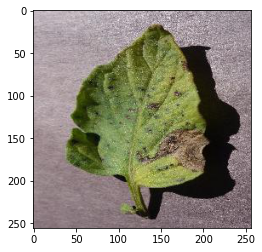

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

5.Visualizing The Image After Every Layer.


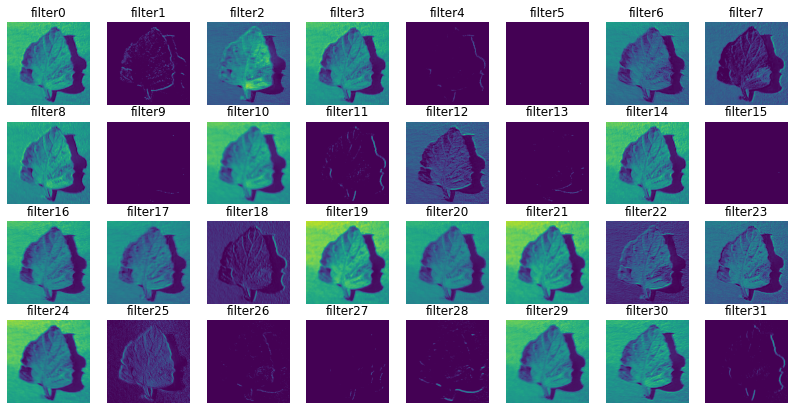

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

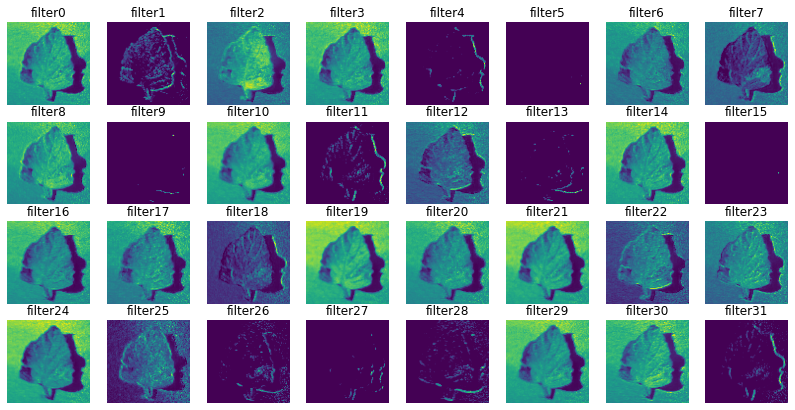

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

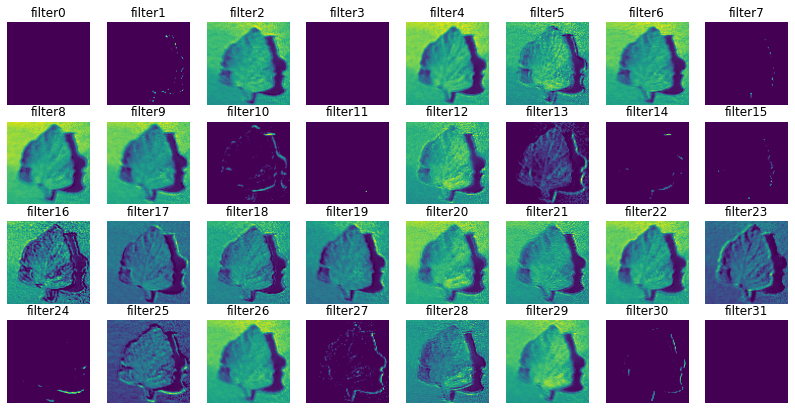

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

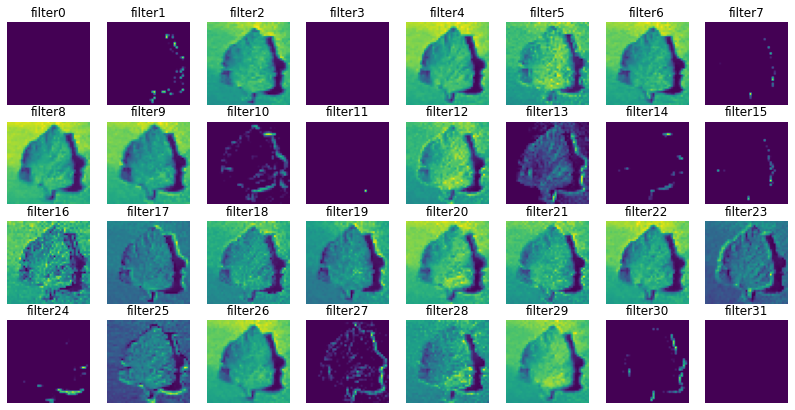

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

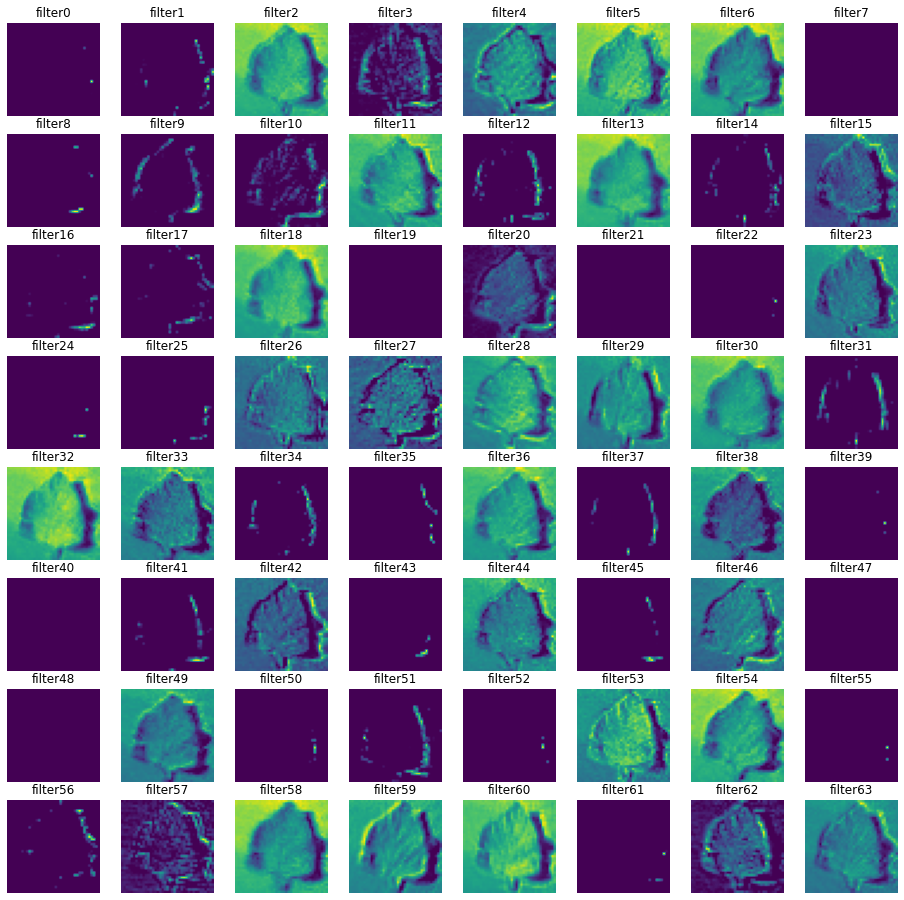

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

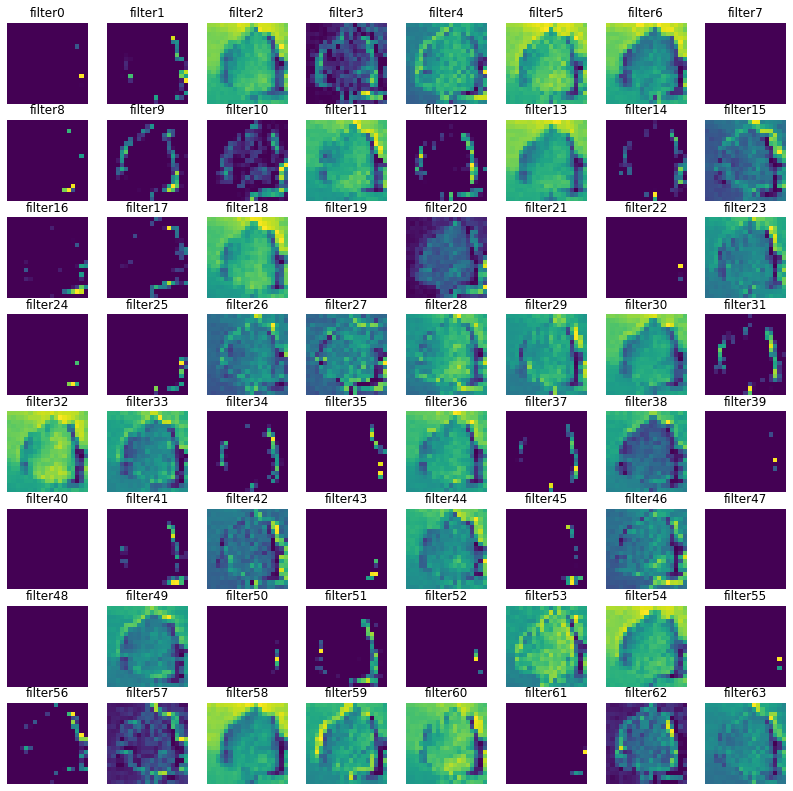

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

6.Training The Model.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          nb_epoch=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)


Epoch 1/15
458/458 [==============================] - 4528s 10s/step - loss: 1.2723 - accuracy: 0.5369 - val_loss: 0.5945 - val_accuracy: 0.7755
Epoch 2/15
458/458 [==============================] - 1308s 3s/step - loss: 0.6412 - accuracy: 0.7777 - val_loss: 0.3868 - val_accuracy: 0.8322
Epoch 3/15
458/458 [==============================] - 1305s 3s/step - loss: 0.4868 - accuracy: 0.8300 - val_loss: 0.2367 - val_accuracy: 0.8828
Epoch 4/15
458/458 [==============================] - 1314s 3s/step - loss: 0.4233 - accuracy: 0.8519 - val_loss: 0.2619 - val_accuracy: 0.8968
Epoch 5/15
458/458 [==============================] - 1321s 3s/step - loss: 0.3249 - accuracy: 0.8852 - val_loss: 0.4351 - val_accuracy: 0.9062
Epoch 6/15
458/458 [==============================] - 1328s 3s/step - loss: 0.3290 - accuracy: 0.8865 - val_loss: 0.5195 - val_accuracy: 0.8715
Epoch 7/15
458/458 [==============================] - 1367s 3s/step - loss: 0.2806 - accuracy: 0.9045 - val_loss: 0.1685 - val_accuracy

7.Plot For Accuracy And Losses.


In [ ]:
acc = train_generator.history['acc']
val_acc = train_generator.history['val_acc']
loss = train_generator.history['loss']
val_loss = train_generator.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

NameError: ignored

8. Evaluate model using unseen data.


In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

144/144 [==============================] - 1319s 9s/step
Test score is 0.010074753314256668
Test accuracy is 0.9430752396583557


9.Saving Model.


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

10.Load Model.


In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight",
           "Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite",
           "Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus",
           "Tomato___healthy"]


11.Time For Predictions.


Tomato___Late_blight


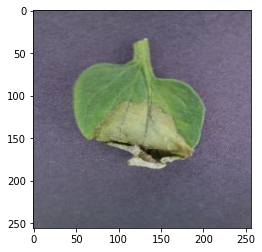

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/32482915-ead6-4e0e-8b3e-a14dd3546b0f___GHLB2 Leaf 8595.JPG')])
disease=image.load_img('/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/32482915-ead6-4e0e-8b3e-a14dd3546b0f___GHLB2 Leaf 8595.JPG')
plt.imshow(disease)
print (Classes[int(result)])

12.Convert Model To "tflite format.".
This conversion is done because to make our model interpertable with App.
tflite is tensorflowlite made for mobile versions.

In [ ]:
# WHOLE MODEL
tflite_model = tf.keras.models.load_model('crop.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("generated.tflite", "wb").write(tflite_save)

47710736